In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score,f1_score,precision_score, classification_report
from sklearn import preprocessing

In [2]:
#importing the data set
data = pd.read_csv("C:/Users/Siri/Desktop/Excelr/Assignments/14. Decision Tree/Fraud_check.csv")

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data_1= data.rename(columns={"Undergrad": "Undergrad","Marital.Status":"Relationship","Taxable.Income":"Tax","City.Population":"Population","Work.Experience":"Experience","Urban":"Urban"})

In [5]:
data_1['Tax'] = data_1.Tax.map(lambda  taxable_income : 'Risky' if taxable_income <= 30000 else 'Good')

In [6]:
data_1.head()

,Undergrad,Relationship,Tax,Population,Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Undergrad     600 non-null    object
 1   Relationship  600 non-null    object
 2   Tax           600 non-null    object
 3   Population    600 non-null    int64 
 4   Experience    600 non-null    int64 
 5   Urban         600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [8]:
#Presprocessing the data set
label_encoder = preprocessing.LabelEncoder()
data_1['Tax'] = label_encoder.fit_transform(data_1['Tax'])
data_1['Undergrad'] = label_encoder.fit_transform(data_1['Undergrad'])
data_1['Relationship'] = label_encoder.fit_transform(data_1['Relationship'])
data_1['Urban'] = label_encoder.fit_transform(data_1['Urban'])

In [9]:
data_1.columns

Index(['Undergrad', 'Relationship', 'Tax', 'Population', 'Experience',
       'Urban'],
      dtype='object')

In [10]:
data_1

,Undergrad,Relationship,Tax,Population,Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [11]:
x=data_1[['Undergrad','Relationship','Population','Experience','Urban']]
y=data_1['Tax']

In [12]:
x

,Undergrad,Relationship,Population,Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Tax, Length: 600, dtype: int32

In [14]:
colnames = list(data_1.columns)
colnames

['Undergrad', 'Relationship', 'Tax', 'Population', 'Experience', 'Urban']

In [15]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=10)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((420, 5), (180, 5), (420,), (180,))

In [17]:
y_train

266    0
146    0
400    0
296    0
273    0
      ..
369    0
320    0
527    0
125    0
265    1
Name: Tax, Length: 420, dtype: int32

# Building Decision Tree Classifier using Entropy Criteria

In [26]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,class_weight='balanced')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
class_weight='balanced'

In [27]:
y_pred.shape

(180,)

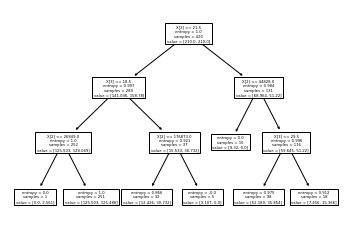

In [28]:
#PLot the decision tree
tree.plot_tree(model);

[Text(503.75, 792.75, 'Experience <= 21.5\nentropy = 1.0\nsamples = 420\nvalue = [210.0, 210.0]\nclass = 0(Risky)'),
 Text(310.0, 566.25, 'Experience <= 18.5\nentropy = 0.997\nsamples = 289\nvalue = [141.036, 158.78]\nclass = 1(Good)'),
 Text(155.0, 339.75, 'Population <= 26849.0\nentropy = 1.0\nsamples = 252\nvalue = [125.503, 128.049]\nclass = 1(Good)'),
 Text(77.5, 113.25, 'entropy = 0.0\nsamples = 1\nvalue = [0.0, 2.561]\nclass = 1(Good)'),
 Text(232.5, 113.25, 'entropy = 1.0\nsamples = 251\nvalue = [125.503, 125.488]\nclass = 0(Risky)'),
 Text(465.0, 339.75, 'Population <= 176873.0\nentropy = 0.921\nsamples = 37\nvalue = [15.533, 30.732]\nclass = 1(Good)'),
 Text(387.5, 113.25, 'entropy = 0.866\nsamples = 32\nvalue = [12.426, 30.732]\nclass = 1(Good)'),
 Text(542.5, 113.25, 'entropy = -0.0\nsamples = 5\nvalue = [3.107, 0.0]\nclass = 0(Risky)'),
 Text(697.5, 566.25, 'Population <= 44828.0\nentropy = 0.984\nsamples = 131\nvalue = [68.964, 51.22]\nclass = 0(Risky)'),
 Text(620.0, 339

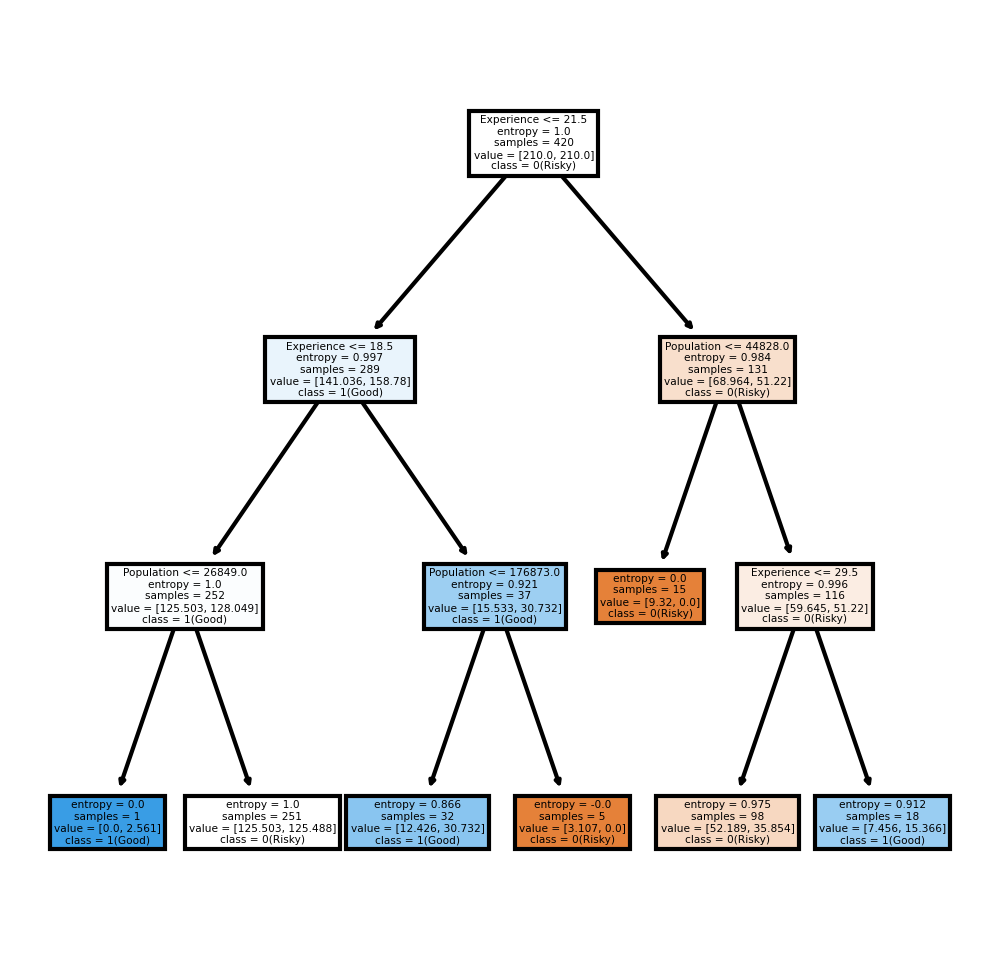

In [29]:
fn=['Undergrad','Relationship', 'Population', 'Experience', 'Urban']
cn=["0(Risky)","1(Good)"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)

In [30]:
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.7055555555555556


In [23]:
pd.crosstab(y_pred,y_test)

Tax,0,1
row_0,,
0,134,41
1,4,1


In [24]:
count_misclassified =(y_test != y_pred).sum()
count_misclassified

45

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       138
           1       0.20      0.02      0.04        42

    accuracy                           0.75       180
   macro avg       0.48      0.50      0.45       180
weighted avg       0.63      0.75      0.67       180

